In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# from sklearn.impute import KNNImputer

In [2]:
model_train = pd.read_csv('C:\\Users\\BGCNHK\\Desktop\\Bootcamp\\Projects\\Model Train.csv').drop('Unnamed: 0',axis=1)
model_test = pd.read_csv('C:\\Users\\BGCNHK\\Desktop\\Bootcamp\\Projects\\Model Test.csv').drop('Unnamed: 0',axis=1)
test_df = pd.read_csv('C:\\Users\\BGCNHK\\Desktop\\Bootcamp\\Projects\\test.csv')
print((model_train).head(5))
print((model_test).head(5))
test_df

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   134          20       RL          NaN     6853   Pave   NaN      IR1   
1   291          60       RL        120.0    15611   Pave   NaN      Reg   
2    25          20       RL          NaN     8246   Pave   NaN      IR1   
3  1094          20       RL         71.0     9230   Pave   NaN      Reg   
4  1289         120       RL         40.0     5664   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      6   2009        WD         Norm

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [3]:
test_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Numeric Variable & Ordinal Var Transform

In [11]:
# model_train['GrLivArea'] = np.log(model_train['GrLivArea'])
# model_test['GrLivArea'] = np.log(model_test['GrLivArea'])
# test_df['GrLivArea'] = np.log(test_df['GrLivArea'])
# model_train['LogPrice'] = np.log(model_train['SalePrice'])
model_test['LogPrice'] = np.log(model_test['SalePrice'])

### BathCombined_AbvGr

In [5]:
model_train['BathCombined_AbvGr'] = model_train['FullBath'] + model_train['HalfBath']*0.5
model_test['BathCombined_AbvGr'] = model_test['FullBath'] + model_test['HalfBath']*0.5
test_df['BathCombined_AbvGr'] = test_df['FullBath'] + test_df['HalfBath']*0.5
# print(model_train['BathCombined_AbvGr'])
# print(model_test['BathCombined_AbvGr'])
# test['BathCombined_AbvGr']

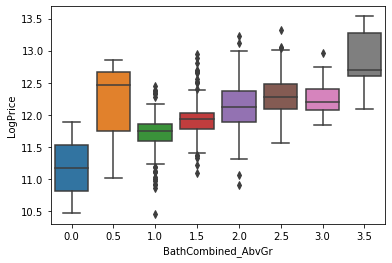

In [7]:
sns.boxplot(x='BathCombined_AbvGr', y='LogPrice', data=model_train)

### BathCombined_Bsmt

In [8]:
model_train['BathCombined_Bsmt'] = model_train['BsmtFullBath'] + model_train['BsmtHalfBath']*0.5
model_test['BathCombined_Bsmt'] = model_test['BsmtFullBath'] + model_test['BsmtHalfBath']*0.5
test_df['BathCombined_Bsmt'] = test_df['BsmtFullBath'] + test_df['BsmtHalfBath']*0.5
# print(model_train['BathCombined_Bsmt'])
# print(model_test['BathCombined_Bsmt'])
# test['BathCombined_Bsmt']

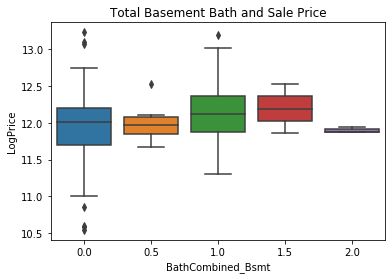

In [13]:
sns.boxplot(x='BathCombined_Bsmt', y='LogPrice', data=model_test)
plt.title('Total Basement Bath and Sale Price')
plt.savefig('Total Basement Bath and Sale Price')

In [7]:
print(model_train['HeatingQC'].unique())
print(model_test['HeatingQC'].unique())
print(test_df['HeatingQC'].unique())
print(model_train['CentralAir'].unique())
print(model_test['CentralAir'].unique())
print(test_df['CentralAir'].unique())
print(model_train['FireplaceQu'].unique())
print(model_test['FireplaceQu'].unique())
print(test_df['FireplaceQu'].unique())

['Ex' 'Gd' 'TA' 'Fa' 'Po']
['TA' 'Ex' 'Gd' 'Fa']
['TA' 'Gd' 'Ex' 'Fa' 'Po']
['Y' 'N']
['Y' 'N']
['Y' 'N']
[nan 'Gd' 'TA' 'Ex' 'Fa' 'Po']
[nan 'TA' 'Po' 'Gd' 'Fa' 'Ex']
[nan 'TA' 'Gd' 'Po' 'Fa' 'Ex']


In [14]:
model_train['HeatingQC'] = model_train['HeatingQC'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
model_test['HeatingQC'] = model_test['HeatingQC'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
test_df['HeatingQC'] = test_df['HeatingQC'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1, 'Po':0})

### transform ordinal vars - CentralAir, FireplaceQu

In [15]:
def CentralAir(x):
    Central = x.replace({'Y':1,'N':0})
    return Central
def FireplaceQu(x):
    Fire = x.replace({'Gd':4, 'TA':3, 'Ex':5, 'Fa':2, 'Po':1, np.nan:0})
    return Fire

In [16]:
model_train['CentralAir'] = CentralAir(model_train['CentralAir'])
model_test['CentralAir'] = CentralAir(model_test['CentralAir'])
test_df['CentralAir'] = CentralAir(test_df['CentralAir'])

model_train['FireplaceQu'] = FireplaceQu(model_train['FireplaceQu'])
model_test['FireplaceQu'] = FireplaceQu(model_test['FireplaceQu'])
test_df['FireplaceQu'] = FireplaceQu(test_df['FireplaceQu'])

In [17]:
num_cols = ['GrLivArea', 'HeatingQC','CentralAir','BathCombined_AbvGr', 'BathCombined_Bsmt','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','FireplaceQu']

### Impute missing values

In [18]:
missing_impute = SimpleImputer(strategy='median')
missing_impute = missing_impute.fit(model_train[num_cols])

missing_impute_model_train = pd.DataFrame(missing_impute.transform(model_train[num_cols]),columns = num_cols)
missing_impute_model_test = pd.DataFrame(missing_impute.transform(model_test[num_cols]),columns = num_cols)
missing_impute_test_df = pd.DataFrame(missing_impute.transform(test_df[num_cols]), columns = num_cols)

In [19]:
test_df['BathCombined_Bsmt'].isnull().sum()

2

In [20]:
num_scaler = StandardScaler()
num_scaler = num_scaler.fit(model_train[num_cols])
num_scaler_model_train = pd.DataFrame(num_scaler.transform(missing_impute_model_train),columns=num_cols)
num_scaler_model_test = pd.DataFrame(num_scaler.transform(missing_impute_model_test),columns=num_cols)
num_scaler_test_df = pd.DataFrame(num_scaler.transform(missing_impute_test_df),columns=num_cols)

In [21]:
num_scaler.scale_

array([0.32952325, 0.96864207, 0.25112193, 0.63163103, 0.51635426,
       0.81216703, 0.22837613, 1.59112755, 0.63880134, 1.82365003])

# Categorical Variable Transform

In [20]:
cat_cols = ['Electrical', 'Functional']

### Electrical - impute missingness

In [21]:
model_train['Electrical'] = model_train['Electrical'].fillna('SBrkr')
model_train['Electrical'] = np.where(model_train['Electrical']!= 'SBrkr','Other',model_train['Electrical'])

In [ ]:
# cat_imp = SimpleImputer(strategy='most_frequent')
# cat_imp = cat_imp.fit(model_train[cat_cols])
# cat_imp_model_train = pd.DataFrame(cat_imp.transform(model_train[cat_cols]),columns = cat_cols)
# cat_imp_model_test = pd.DataFrame(cat_imp.transform(model_test[cat_cols]),columns = cat_cols)
# cat_imp_test = pd.DataFrame(cat_imp.transform(test[cat_cols]),columns = cat_cols)

### Functional - remove outliers

In [22]:
def f(x):
    y=np.where(x!='SBrkr','Other',x)
    return y
model_test['Electrical'] = f(model_test['Electrical'])
test_df['Electrical'] = f(test_df['Electrical'])
# print(model_test['Electrical'])
# test['Electrical']

In [23]:
def functional(x):
    func = np.where(x!='Typ','Other',x)
    return func
model_train['Functional'] = functional(model_train['Functional'])
model_test['Functional'] = functional(model_test['Functional'])
test_df['Functional'] = functional(test_df['Functional'])
print((model_train['Functional']).unique())
print((model_test['Functional']).unique())
test_df['Functional'].unique()

['Typ' 'Other']
['Typ' 'Other']


array(['Typ', 'Other'], dtype=object)

### OHE transformation

In [24]:
drop_col = model_train[cat_cols].apply(lambda col: col.value_counts().index[0])

cat_ohe = OneHotEncoder(categories='auto', drop=drop_col, sparse = False)
cat_ohe = cat_ohe.fit(model_train[cat_cols])

new_cols = cat_ohe.get_feature_names(cat_cols)
cat_ohe_model_train = pd.DataFrame(cat_ohe.transform(model_train[cat_cols]),columns=new_cols )
cat_ohe_model_test = pd.DataFrame(cat_ohe.transform(model_test[cat_cols]),columns=new_cols )
cat_ohe_test_df = pd.DataFrame(cat_ohe.transform(test_df[cat_cols]),columns=new_cols )

# Ordinal Variable Transformation

In [ ]:
# ord_cols = ['HeatingQC','CentralAir','BathCombined_AbvGr', 'BathCombined_Bsmt','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','FireplaceQu']

- ### max and min

In [ ]:
# ord_scaler = MinMaxScaler()
# ord_scaler = ord_scaler.fit(ord_imp_model_train)

# ord_scaler_model_train = pd.DataFrame(ord_scaler.transform(ord_imp_model_train),columns = ord_cols)
# ord_scaler_model_test = pd.DataFrame(ord_scaler.transform(ord_imp_model_test),columns = ord_cols)
# ord_scaler_test_df = pd.DataFrame(ord_scaler.transform(ord_imp_test_df), columns = ord_cols)

# Final Processed Version

In [29]:
final_model_train = pd.concat([num_scaler_model_train,cat_ohe_model_train,model_train['Id'],model_train['SalePrice']],axis=1)
final_model_test = pd.concat([num_scaler_model_test,cat_ohe_model_test,model_test['Id'],model_test['SalePrice']],axis=1)
final_test_df = pd.concat([num_scaler_test_df,cat_ohe_test_df,test_df['Id']],axis=1)

In [30]:
final_model_train.to_csv('final_model_train.csv', index=True)
final_model_test.to_csv('final_model_test.csv',index=True)
final_test_df.to_csv('final_test_df.csv',index=True)